# <center> 💉Biomedical Image Segmentation with U-Net📈 </center>

<a id="ToC"></a>
# Table of Contents
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Loading and Preperation](#3)
    - [3.1 Exploring data](#3.1)
    - [3.2 Loading data](#3.2)
- [4. EDA](#4)
    - [4.1 Data of each class ](#4.1)
    - [4.2 Average view of masks each class](#4.2)
- [5. Data Pre-Processing](#5)    
- [6. Modeling](#6)
    - [6.1 Building U-Net Architecture](#6.1)
    - [6.2 Training](#6.2)
- [7. Evaluation](#7)   

<a id="1"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Introduction </span></center></div>**

![](https://storage.googleapis.com/kaggle-datasets-images/1209633/2021025/67b9223181141133207afc36e35e3c5d/dataset-cover.jpg?t=2021-03-14-15-48-53)

### About Dataset

* **Breast cancer** is one of the **most common** causes of death among **women worldwide**. Early detection helps in reducing the **number of early deaths**. The data reviews the **medical images of breast cancer** using ultrasound scan. **Breast Ultrasound Dataset** is categorized into **three classes** $:$ **normal, benign, and malignant images**. **Breast ultrasound images** can produce great results in **classification, detection, and segmentation** of breast cancer when combined with machine learning. 

* The data collected at baseline include **breast ultrasound images among women** in ages between 25 and 75 years old. This data was collected in **2018**. The number of patients is **600 female patients**. The dataset consists of **780 images** with an **average image size of 500*500 pixels**. The images are in PNG format. The ground truth images are presented with original images. The images are categorized into **three classes, which are normal, benign, and malignant**.

## What is U-Net?

- **U-Net** is a popular deep-learning **architecture for semantic segmentation**. Originally developed for **medical images**, it had great success in this field. But, that was only the beginning! From satellite images to handwritten characters, the architecture has improved performance on a range of data types.
- The **U-Net architecture** has been widely used in various medical image segmentation tasks, such as **brain tumor segmentation, lung segmentation, and cell segmentation**, among others.

### U-Net: Convolutional Networks for Biomedical Image Segmentation

![](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

- U-net architecture (example for 32x32 pixels in the lowest resolution). Each blue box corresponds to a multi-channel feature map. The number of channels is denoted on top of the box. The x-y-size is provided at the lower left edge of the box. White boxes represent copied feature maps. The arrows denote the different operations.

- This illustration is an example of Unet architecture but layers can have different size.

**We apply it for breast cancer image segmentation with some modifications to the model.**

<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Imports </span></center></div>**

In [1]:
# Common
import tensorflow as tf
from glob import glob
import numpy as np

# Data
from sklearn.model_selection import train_test_split
import cv2

# Data visualization
import matplotlib.pyplot as plt

# Model
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from keras.optimizers import Adam

# Metrics
from tensorflow.keras.metrics import *

<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Data Loading and Preparation </span></center></div>**

<a id="3.1"></a>
## <span style="color:#08bf2c;"> Exploring data : </span>

In [2]:
paths = glob('/kaggle/input/tnbc-resized/*/*')

print(f'\033[92m')
print(f"'normal' class has {len([i for i in paths if 'normal' in i and 'mask' not in i])} images and {len([i for i in paths if 'normal' in i and 'mask' in i])} masks.")
print(f"'benign' class has {len([i for i in paths if 'bening' in i and 'mask' not in i])} images and {len([i for i in paths if 'bening' in i and 'mask' in i])} masks.")
print(f"'malignant' class has {len([i for i in paths if 'malignant' in i and 'mask' not in i])} images and {len([i for i in paths if 'malignant' in i and 'mask' in i])} masks.")
print(f"\nThere are total of {len([i for i in paths if 'mask' not in i])} images and {len([i for i in paths if 'mask' in i])} masks.")


'normal' class has 0 images and 0 masks.
'benign' class has 0 images and 0 masks.
'malignant' class has 0 images and 0 masks.

There are total of 50 images and 50 masks.


In [3]:
sorted(glob('/kaggle/input/ic-wunu-v6/*'))[0:480]

['/kaggle/input/ic-wunu-v6/image_1_01_01.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_01_mask.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_02.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_02_mask.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_03.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_03_mask.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_04.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_04_mask.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_05.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_05_mask.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_06.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_06_mask.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_07.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_07_mask.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_08.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_08_mask.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_09.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_09_mask.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_10.png',
 '/kaggle/input/ic-wunu-v6/image_1_01_10_mask.png',
 '/kaggle/

*** Some images have 2 or more masks. Combine them into one image.**

<a id="3.2"></a>
## <span style="color:#08bf2c;"> Loading data </span>

Functions

In [4]:
def load_image(path, size):
    image = cv2.imread(path)
    image = cv2.resize(image, (size,size))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)   # shape: (size,size,3) -> (size,size,1)
    image = image/255.   # normalize
    return image

def load_data(root_path, size):
    images = []
    masks = []
    
    x = 0   # additional variable to identify images consisting of 2 or more masks
    
    for path in sorted(glob(root_path)):
        img = load_image(path, size)   # read mask or image
            
        if 'mask' in path:
            if x:   # this image has masks more than one
                masks[-1] += img   # add the mask to the last mask
                    
                # When 2 masks are added, the range can increase by 0-2. So we will reduce it again to the range 0-1.
                masks[-1] = np.array(masks[-1]>0.5, dtype='float64')
            else:
                masks.append(img)
                x = 1   # if the image has a mask again, the above code will run next time
        else:
            images.append(img)
            x = 0   # for moving to the next image
    return np.array(images), np.array(masks)

In [5]:
def load_image(path, size):
    image = cv2.imread(path)
    image = cv2.resize(image, (size,size))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)   # shape: (size,size,3) -> (size,size,1)
    image = image/255.   # normalize
    return image

def load_data(root_path, size):
    images = []
    masks = []
    
    x = 0   # additional variable to identify images consisting of 2 or more masks
    
    for path in sorted(glob(root_path)):
        img = load_image(path, size)   # read mask or image
            
        if 'mask' in path:
            
            if x:   # this image has masks more than one
                masks[-1] += img   # add the mask to the last mask
                    
                # When 2 masks are added, the range can increase by 0-2. So we will reduce it again to the range 0-1.
                masks[-1] = np.array(masks[-1]>0.5, dtype='float64')
            else:
                masks.append(img)
                x = 1   # if the image has a mask again, the above code will run next time
                print(path)
                
        else:
            images.append(img)
            x = 0   # for moving to the next image
    return np.array(images), np.array(masks)
    
size = 256   # image size: 128x128
X, y = load_data(root_path = '/kaggle/input/ic-wunu-v6/*',size=size)

print(f"X shape: {X.shape}     |  y shape: {y.shape}")


/kaggle/input/ic-wunu-v6/image_1_01_01_mask.png
/kaggle/input/ic-wunu-v6/image_1_01_02_mask.png
/kaggle/input/ic-wunu-v6/image_1_01_03_mask.png
/kaggle/input/ic-wunu-v6/image_1_01_04_mask.png
/kaggle/input/ic-wunu-v6/image_1_01_05_mask.png
/kaggle/input/ic-wunu-v6/image_1_01_06_mask.png
/kaggle/input/ic-wunu-v6/image_1_01_07_mask.png
/kaggle/input/ic-wunu-v6/image_1_01_08_mask.png
/kaggle/input/ic-wunu-v6/image_1_01_09_mask.png
/kaggle/input/ic-wunu-v6/image_1_01_10_mask.png
/kaggle/input/ic-wunu-v6/image_1_01_11_mask.png
/kaggle/input/ic-wunu-v6/image_1_01_12_mask.png
/kaggle/input/ic-wunu-v6/image_1_01_13_mask.png
/kaggle/input/ic-wunu-v6/image_1_02_01_mask.png
/kaggle/input/ic-wunu-v6/image_1_02_02_mask.png
/kaggle/input/ic-wunu-v6/image_1_02_03_mask.png
/kaggle/input/ic-wunu-v6/image_1_02_04_mask.png
/kaggle/input/ic-wunu-v6/image_1_02_05_mask.png
/kaggle/input/ic-wunu-v6/image_1_02_06_mask.png
/kaggle/input/ic-wunu-v6/image_1_02_07_mask.png
/kaggle/input/ic-wunu-v6/image_1_02_08_m

<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> EDA </span></center></div>**

<a id="4.1"></a>
## <span style="color:#08bf2c;"> Data of each class </span>

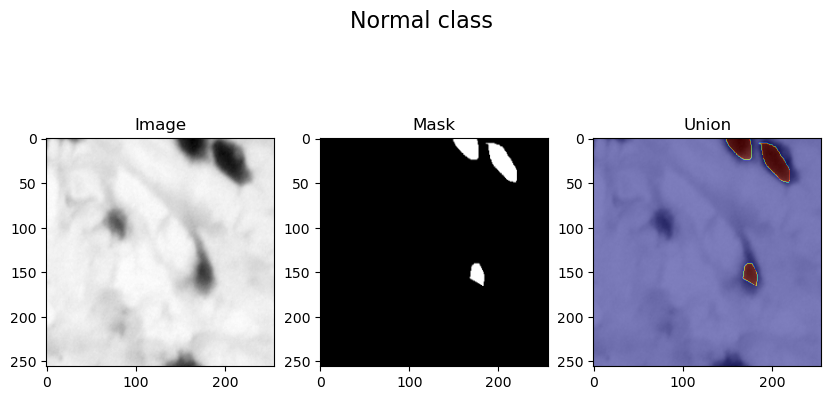

In [6]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

# X[0:437] benign
# X[437:647] malignant
# X[647:780] normal

i = 10
ax[0].imshow(X[i], cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(y[i], cmap='gray')
ax[1].set_title('Mask')
ax[2].imshow(X[i], cmap='gray')
ax[2].imshow(tf.squeeze(y[i]), alpha=0.5, cmap='jet')
ax[2].set_title('Union')
fig.suptitle('Normal class', fontsize=16)
plt.show()

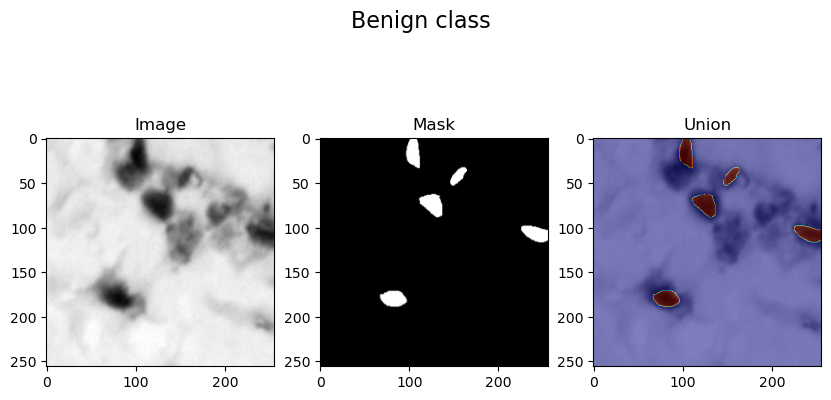

In [7]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

i = np.random.randint(0,14)
ax[0].imshow(X[i], cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(y[i], cmap='gray')
ax[1].set_title('Mask')
ax[2].imshow(X[i], cmap='gray')
ax[2].imshow(tf.squeeze(y[i]), alpha=0.5, cmap='jet')
ax[2].set_title('Union')
fig.suptitle('Benign class', fontsize=16)
plt.show()

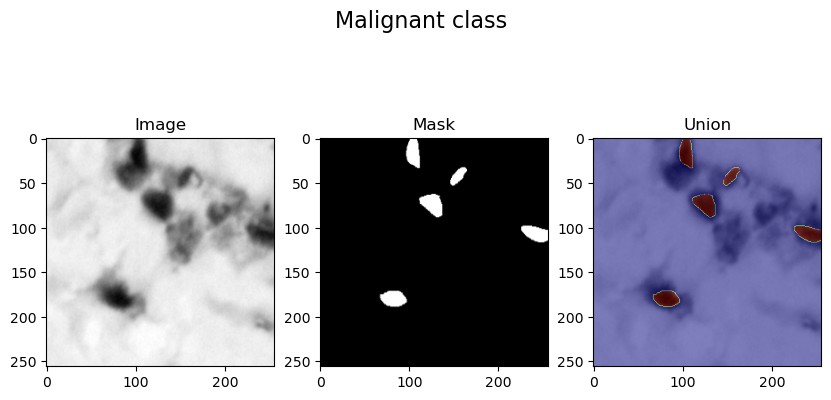

In [8]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

i = np.random.randint(0,16)
ax[0].imshow(X[i], cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(y[i], cmap='gray')
ax[1].set_title('Mask')
ax[2].imshow(X[i], cmap='gray')
ax[2].imshow(tf.squeeze(y[i]), alpha=0.5, cmap='jet')
ax[2].set_title('Union')
fig.suptitle('Malignant class', fontsize=16)
plt.show()

<a id="4.2"></a>
## <span style="color:#08bf2c;"> Average view of masks each class </span>

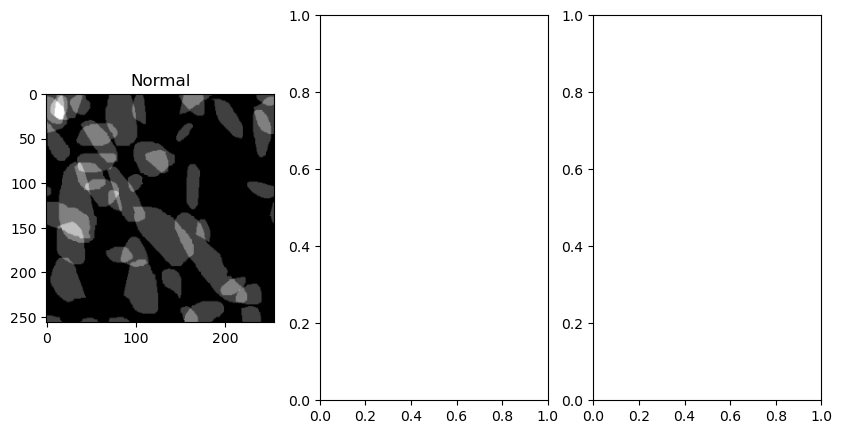

In [9]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

ax[0].imshow(sum(y[0:16]), cmap='gray')
ax[0].set_title('Normal')
#ax[1].imshow(sum(y[0:16]), cmap='gray')
#ax[1].set_title('Benign')
#ax[2].imshow(sum(y[0:0]), cmap='gray')
#ax[2].set_title('Malignant')
plt.show()

<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Data Pre-Processing </span></center></div>**

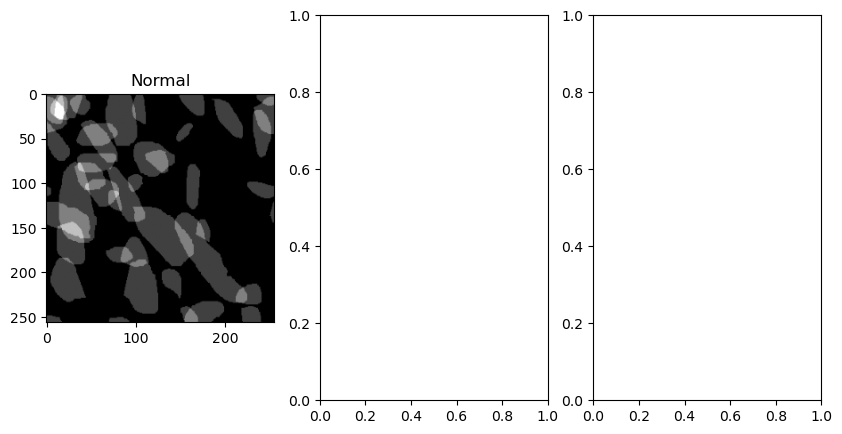

In [10]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

ax[0].imshow(sum(y[0:14]), cmap='gray')
ax[0].set_title('Normal')
#ax[1].imshow(sum(y[:437]), cmap='gray')
#ax[1].set_title('Benign')
#ax[2].imshow(sum(y[437:647]), cmap='gray')
#ax[2].set_title('Malignant')
plt.show()

### <span style="color:#2981d9;"> Prepare data to modeling </span>

In [11]:
# drop normal class because normal class has not mask
#X = X[:647]
#y = y[:647]

print(f"X shape: {X.shape}     |  y shape: {y.shape}")

# prepare data to modeling
X = np.expand_dims(X, -1)
y = np.expand_dims(y, -1)

print(f"\nX shape: {X.shape}  |  y shape: {y.shape}")

X shape: (240, 256, 256)     |  y shape: (240, 256, 256)

X shape: (240, 256, 256, 1)  |  y shape: (240, 256, 256, 1)


In [12]:
# drop normal class because normal class has not mask
#X = X[:647]
#y = y[:647]

print(f"X shape: {X.shape}     |  y shape: {y.shape}")

# prepare data to modeling
X = np.expand_dims(X, -1)
y = np.expand_dims(y, -1)

print(f"\nX shape: {X.shape}  |  y shape: {y.shape}")

X shape: (240, 256, 256, 1)     |  y shape: (240, 256, 256, 1)

X shape: (240, 256, 256, 1, 1)  |  y shape: (240, 256, 256, 1, 1)


### <span style="color:#2981d9;"> Train-test split </span>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(f'\033[92m')
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)


X_train shape: (216, 256, 256, 1, 1)
y_train shape: (216, 256, 256, 1, 1)
X_test shape: (24, 256, 256, 1, 1)
y_test shape: (24, 256, 256, 1, 1)


<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Modeling </span></center></div>**

<a id="6.1"></a>
## <span style="color:#08bf2c;"> Building U-Net Architecture </span>

### <span style="color:#2981d9;"> Conv block </span>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'\033[92m')
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

def conv_block(input, num_filters):
    conv = Conv2D(num_filters, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(input)
    conv = Conv2D(num_filters, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
    return conv


X_train shape: (168, 256, 256, 1, 1)
y_train shape: (168, 256, 256, 1, 1)
X_test shape: (72, 256, 256, 1, 1)
y_test shape: (72, 256, 256, 1, 1)


### <span style="color:#2981d9;"> Encoder block </span>

In [15]:
def encoder_block(input, num_filters):
    conv = conv_block(input, num_filters)
    pool = MaxPooling2D((2, 2))(conv)
    return conv, pool

### <span style="color:#2981d9;"> Decoder block </span>

In [16]:
def decoder_block(input, skip_features, num_filters):
    uconv = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    con = concatenate([uconv, skip_features])
    conv = conv_block(con, num_filters)
    return conv

### <span style="color:#2981d9;"> Build model </span>

In [17]:
def build_model(input_shape):
    input_layer = Input(input_shape)
    
    s1, p1 = encoder_block(input_layer, 128)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 128)
    
    output_layer = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)
    
    model = Model(input_layer, output_layer, name="U-Net")
    return model

model = build_model(input_shape=(size, size, 1))
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

### <span style="color:#2981d9;"> Model plotting </span>

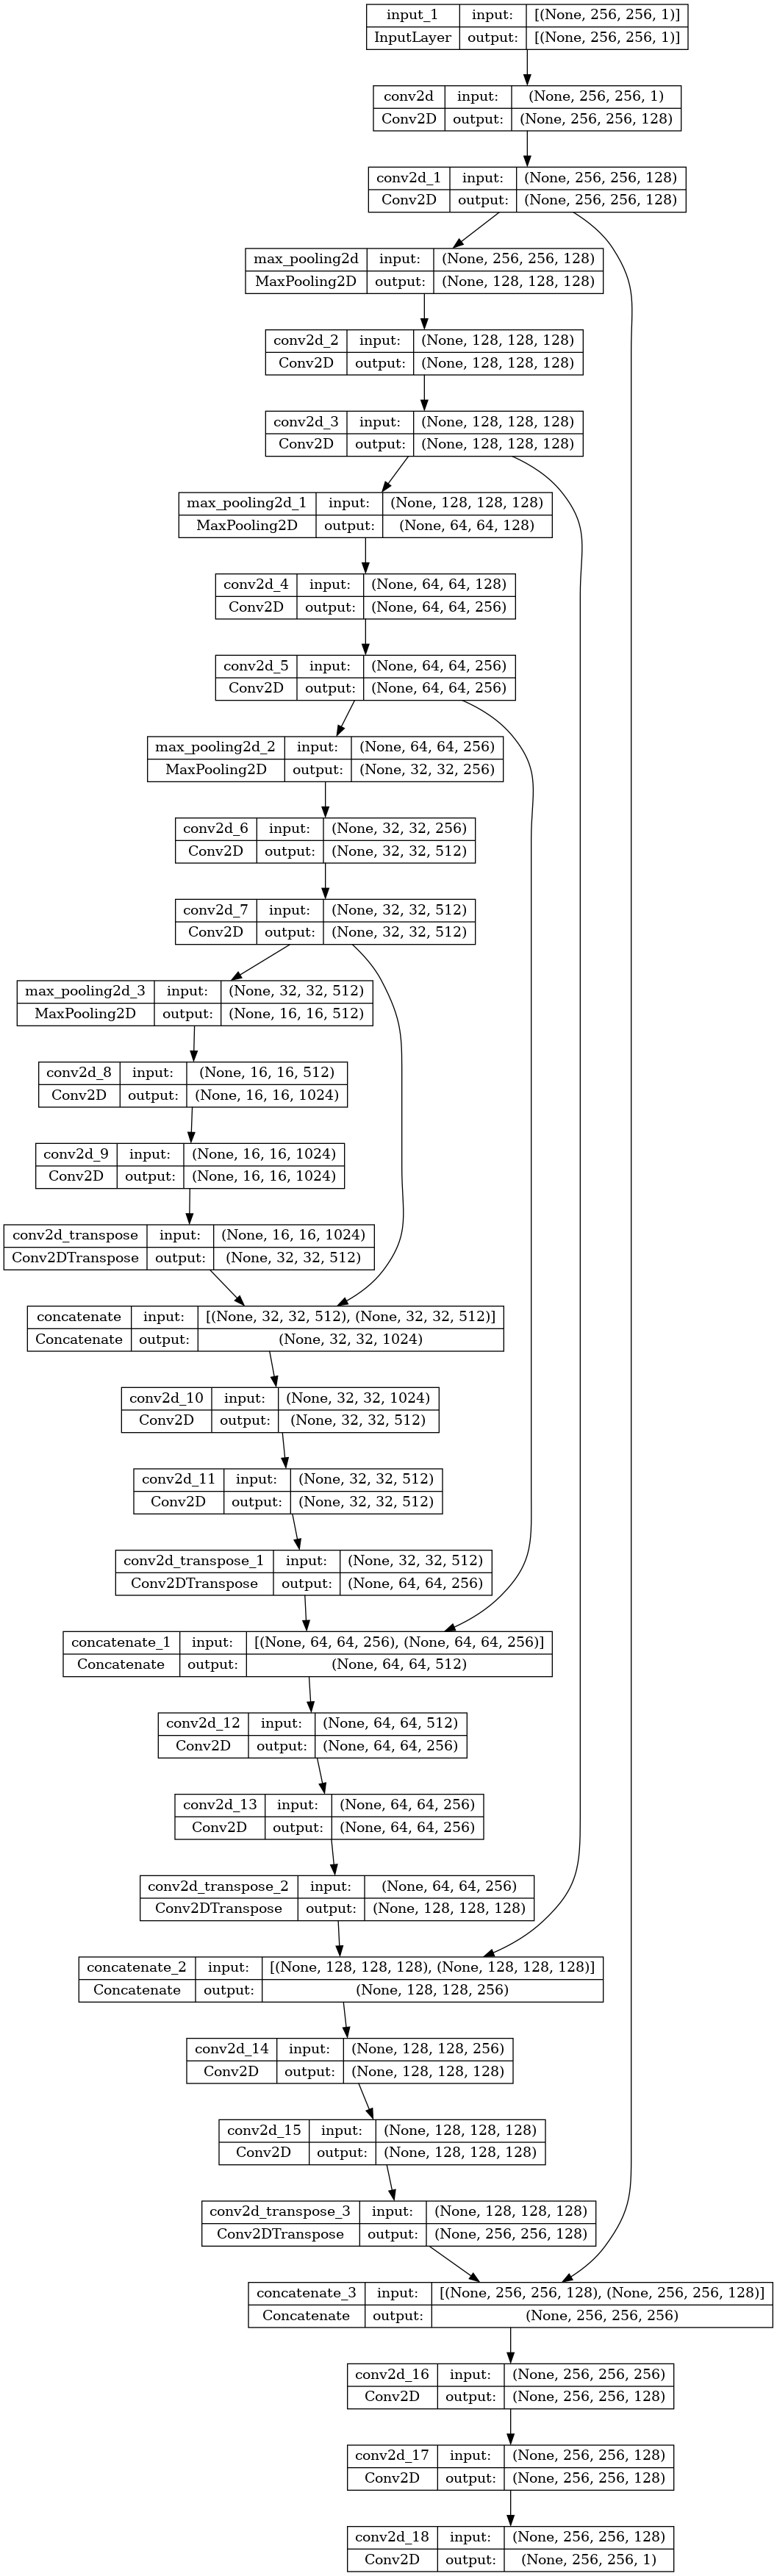

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True)

### <span style="color:#2981d9;"> Model summary </span>

In [19]:
model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 12  1280        ['input_1[0][0]']                
                                8)                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 12  147584      ['conv2d[0][0]']                 
                                8)                                                            

<a id="6.2"></a>
## <span style="color:#08bf2c;"> Training </span>

In [20]:
history = model.fit(X_train, y_train, epochs = 70, validation_data = (X_test,y_test))

Epoch 1/70
6/6 [==============================] - 41s 2s/step - loss: 0.5337 - accuracy: 0.9246 - val_loss: 0.1823 - val_accuracy: 0.9370
Epoch 2/70
6/6 [==============================] - 7s 1s/step - loss: 16.1428 - accuracy: 0.7686 - val_loss: 0.4814 - val_accuracy: 0.9333
Epoch 3/70
6/6 [==============================] - 7s 1s/step - loss: 0.4752 - accuracy: 0.9283 - val_loss: 0.2955 - val_accuracy: 0.9333
Epoch 4/70
6/6 [==============================] - 7s 1s/step - loss: 0.2434 - accuracy: 0.9283 - val_loss: 0.2072 - val_accuracy: 0.9333
Epoch 5/70
6/6 [==============================] - 7s 1s/step - loss: 0.2074 - accuracy: 0.9283 - val_loss: 0.1779 - val_accuracy: 0.9333
Epoch 6/70
6/6 [==============================] - 7s 1s/step - loss: 0.1884 - accuracy: 0.9283 - val_loss: 0.1760 - val_accuracy: 0.9333
Epoch 7/70
6/6 [==============================] - 7s 1s/step - loss: 0.1891 - accuracy: 0.9283 - val_loss: 0.1756 - val_accuracy: 0.9333
Epoch 8/70
6/6 [=======================

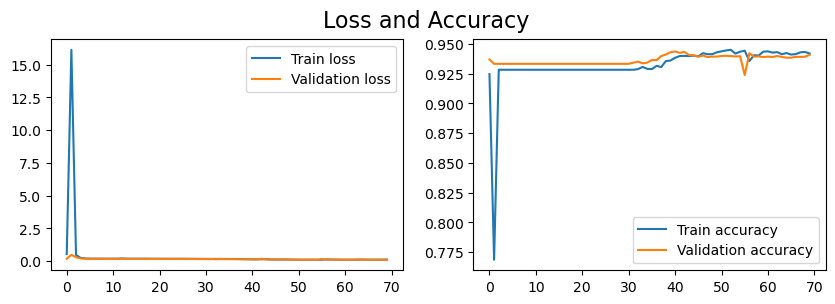

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[0].legend()
ax[1].plot(history.epoch, history.history["accuracy"], label="Train accuracy")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation accuracy")
ax[1].legend()
fig.suptitle('Loss and Accuracy', fontsize=16)
plt.show()

<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="7"></a>
# **<div style="padding:10px;color:white;display:fill;border-radius:5px;background-color:#5642C5;font-size:120%;font-family:Verdana;"><center><span> Evaluation </span></center></div>**

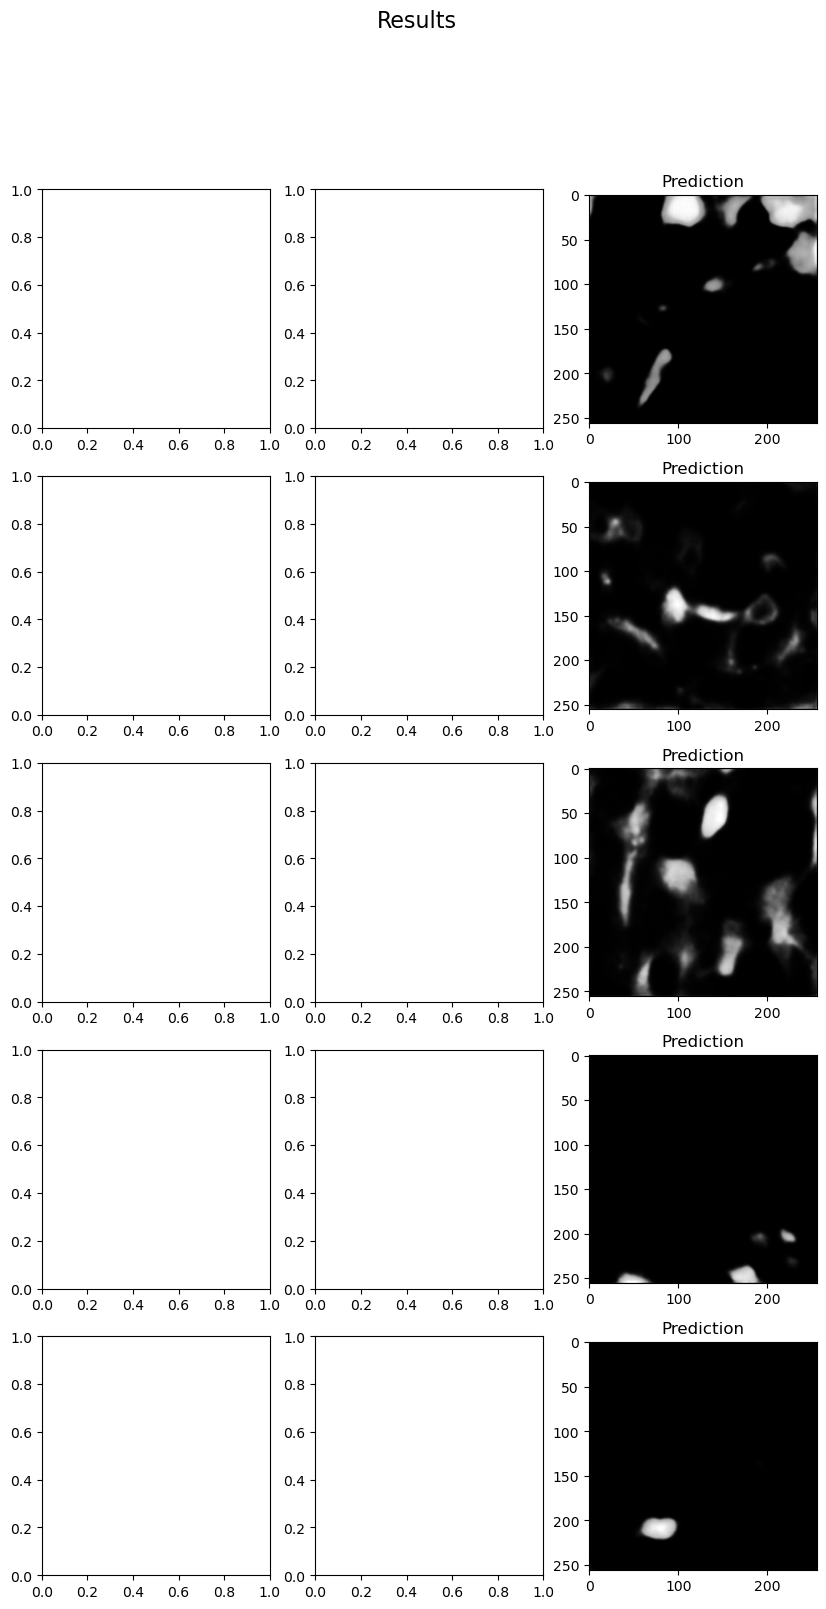

In [22]:
fig, ax = plt.subplots(5,3, figsize=(10,18))

j = np.random.randint(0, X_test.shape[0], 5)
for i in range(5):
    #ax[i,0].imshow(X_test[j[i]], cmap='gray')
    #ax[i,0].set_title('Image')
    #ax[i,1].imshow(y_test[j[i]], cmap='gray')
    #ax[i,1].set_title('Mask')
    ax[i,2].imshow(model.predict(np.expand_dims(X_test[j[i]],0),verbose=0)[0], cmap='gray')
    ax[i,2].set_title('Prediction')
fig.suptitle('Results', fontsize=16)
plt.show()

In [23]:
print(f'\033[93m')
y_pred=model.predict(X_test,verbose=0)
y_pred_thresholded = y_pred > 0.5

# mean Intersection-Over-Union metric
IOU_keras = MeanIoU(num_classes=2)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

prec_score = Precision()
prec_score.update_state(y_pred_thresholded, y_test)
p = prec_score.result().numpy()
print('Precision Score = %.3f' % p)

recall_score = Recall()
recall_score.update_state(y_pred_thresholded, y_test)
r = recall_score.result().numpy()
print('Recall Score = %.3f' % r)

f1_score = 2*(p*r)/(p+r)
print('F1 Score = %.3f' % f1_score)


Mean IoU = 0.61824214
Precision Score = 0.364
Recall Score = 0.602
F1 Score = 0.454


<a href="#ToC" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<blockquote><p style="font-size:15px; color:#159364; font-family:verdana;">💬Thank you for reading! If you have any feedback or find anything wrong, please let me know!🙂</p></blockquote>